In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the churn dataset
churn_df = pd.read_csv('../dataset/churn-data.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Show basic info and statistics about the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
churn_df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

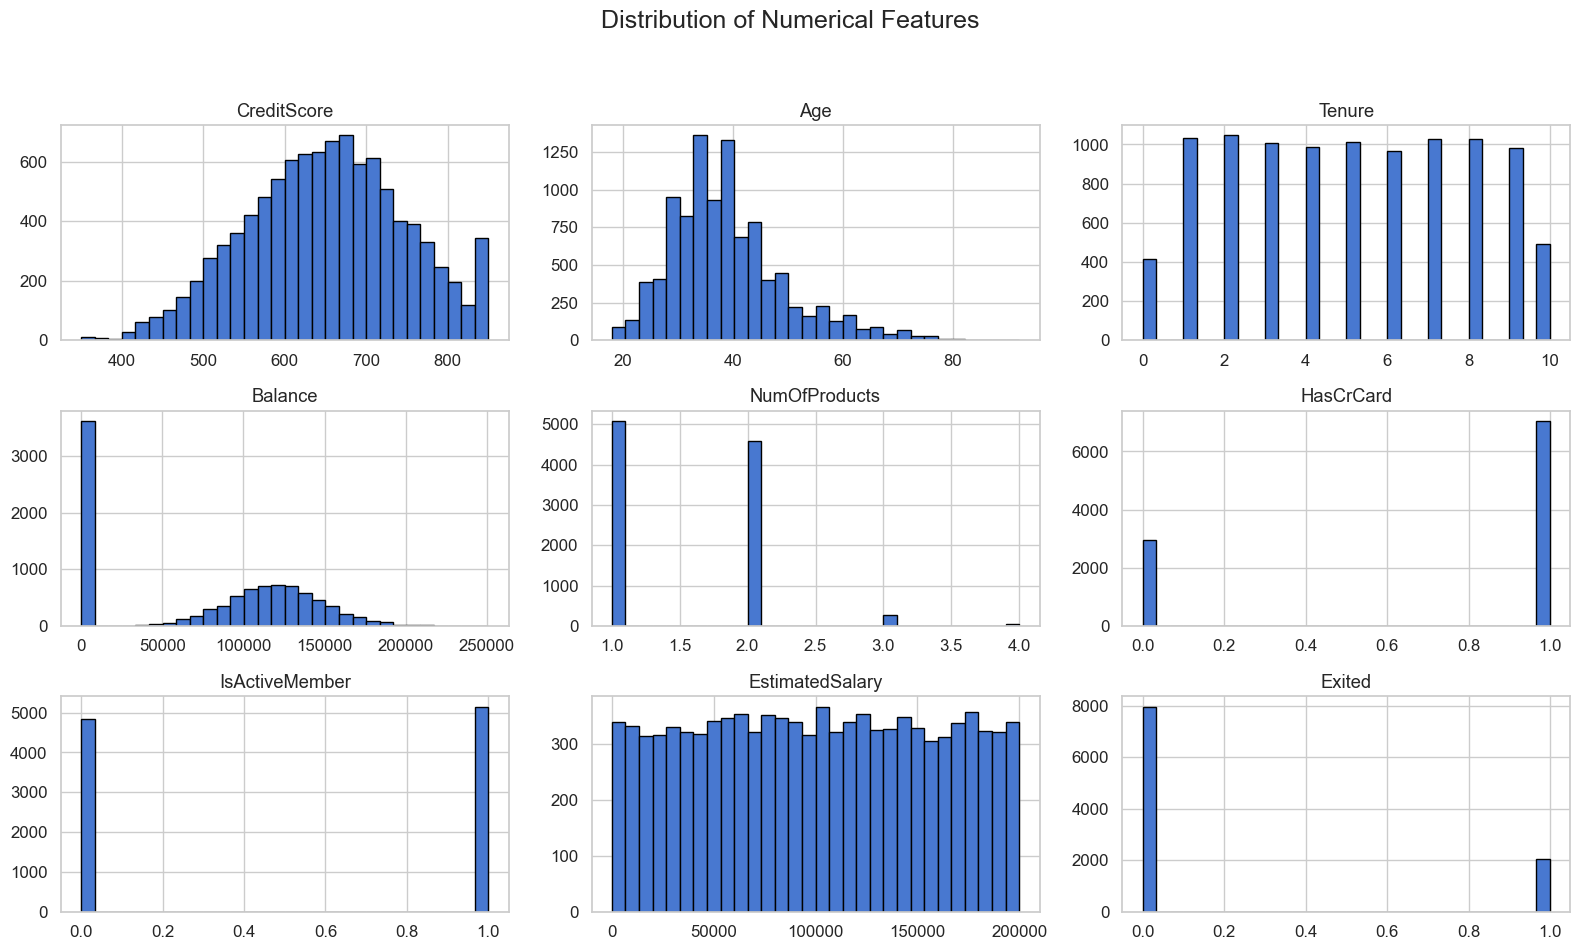

In [ ]:
# Set style for professional plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Plot distribution of numerical features
num_cols = churn_df.select_dtypes(include=['int64', 'float64']).columns
churn_df[num_cols].hist(figsize=(16, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

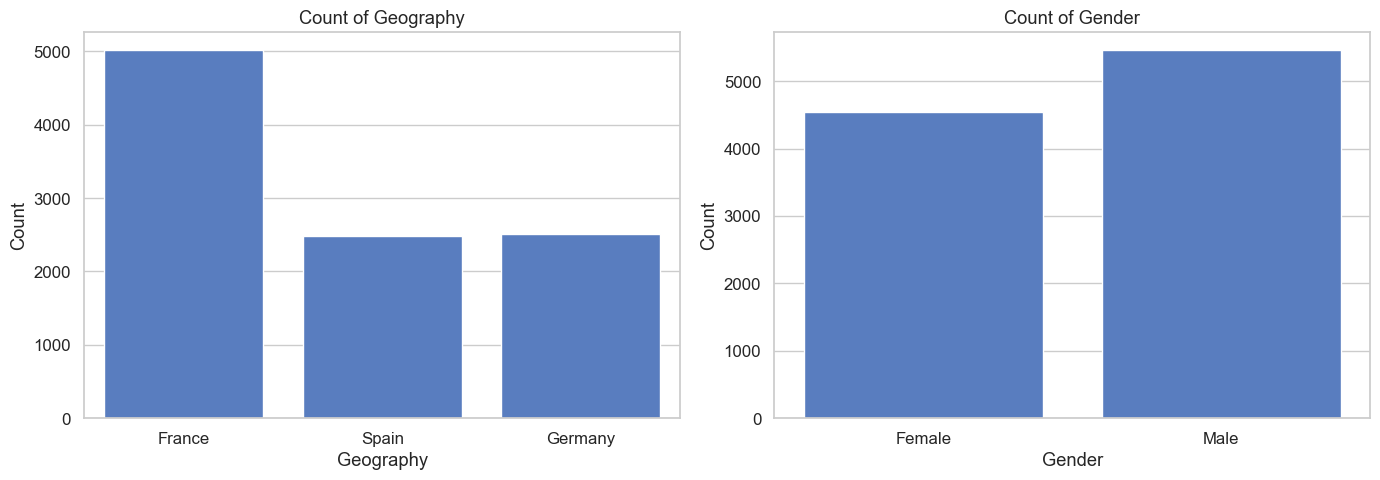

In [11]:
# Plot categorical features
cat_cols = churn_df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(1, len(cat_cols), figsize=(14, 5))
for i, col in enumerate(cat_cols):
    sns.countplot(data=churn_df, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


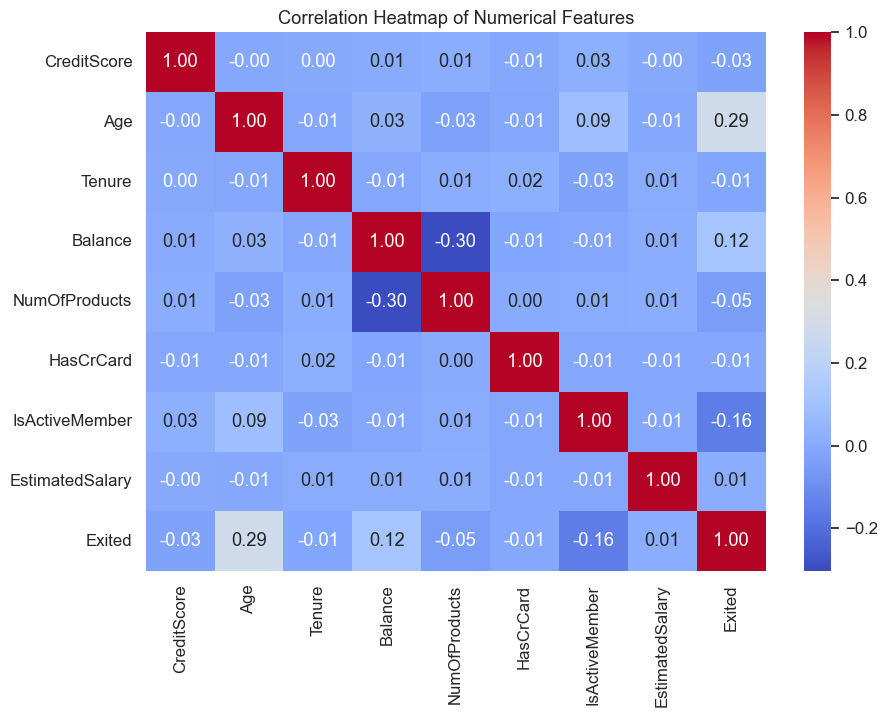

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 7))
corr = churn_df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

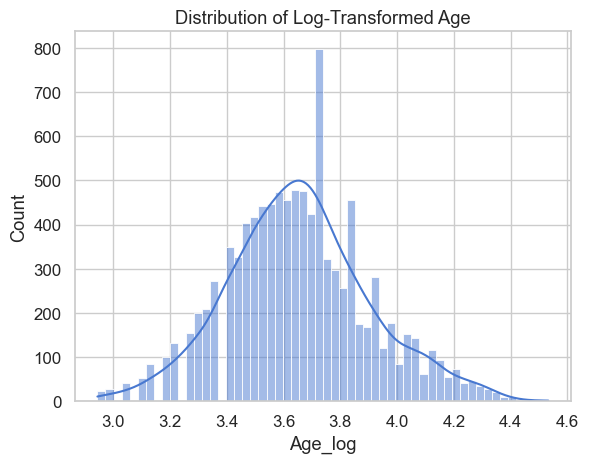

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Create a log1p transformer (log(1 + x) to handle zeros safely)
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Fit and transform the Age column
churn_df['Age_log'] = log_transformer.fit_transform(churn_df[['Age']])

# You can check the new distribution
sns.histplot(churn_df['Age_log'], kde=True)
plt.title('Distribution of Log-Transformed Age')
plt.show()

In [14]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Age_log          10000 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


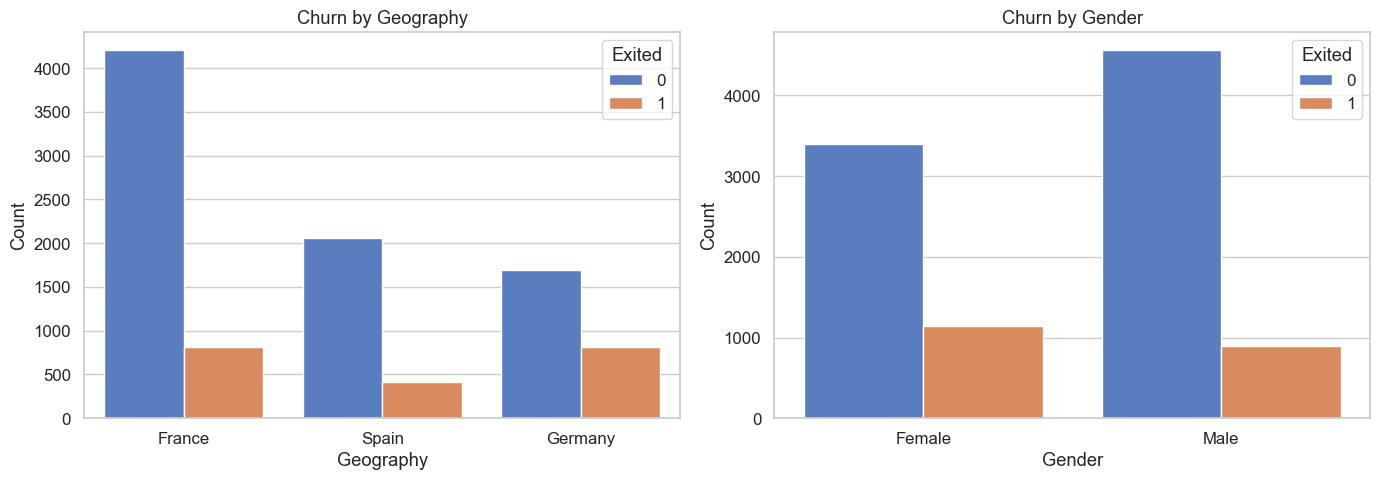

In [16]:
# Bivariate visualizations: target vs. key features

# 1. Categorical vs Target: Exited by Geography and Gender
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=churn_df, x='Geography', hue='Exited', ax=axes[0])
axes[0].set_title('Churn by Geography')
axes[0].set_ylabel('Count')
sns.countplot(data=churn_df, x='Gender', hue='Exited', ax=axes[1])
axes[1].set_title('Churn by Gender')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

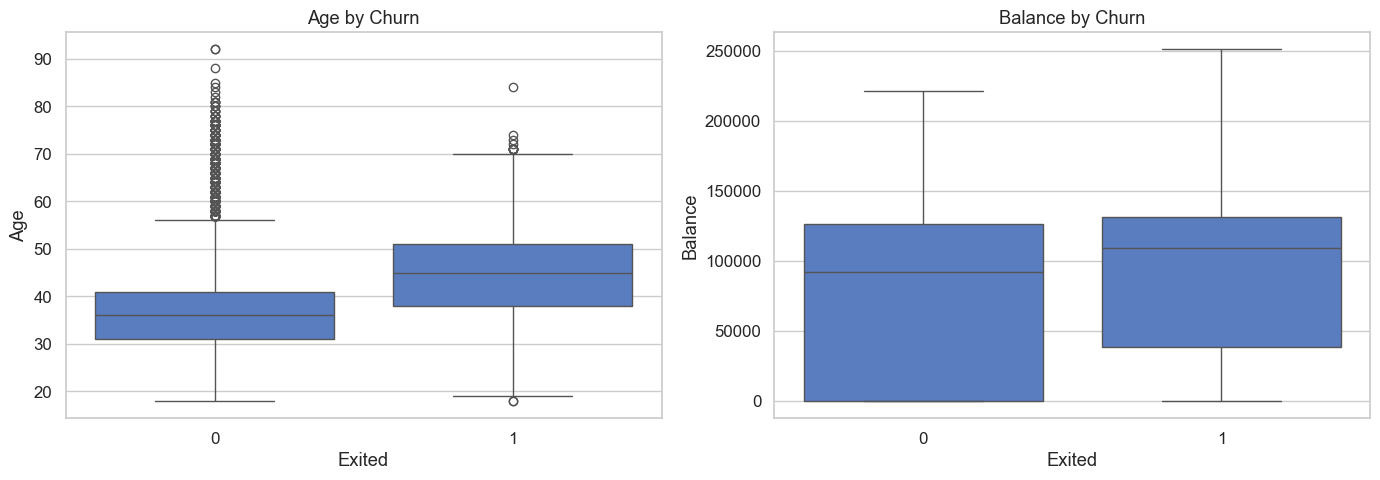

In [15]:
# 2. Numerical vs Target: Age and Balance distributions by Exited
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=churn_df, x='Exited', y='Age', ax=axes[0])
axes[0].set_title('Age by Churn')
sns.boxplot(data=churn_df, x='Exited', y='Balance', ax=axes[1])
axes[1].set_title('Balance by Churn')
plt.tight_layout()
plt.show()

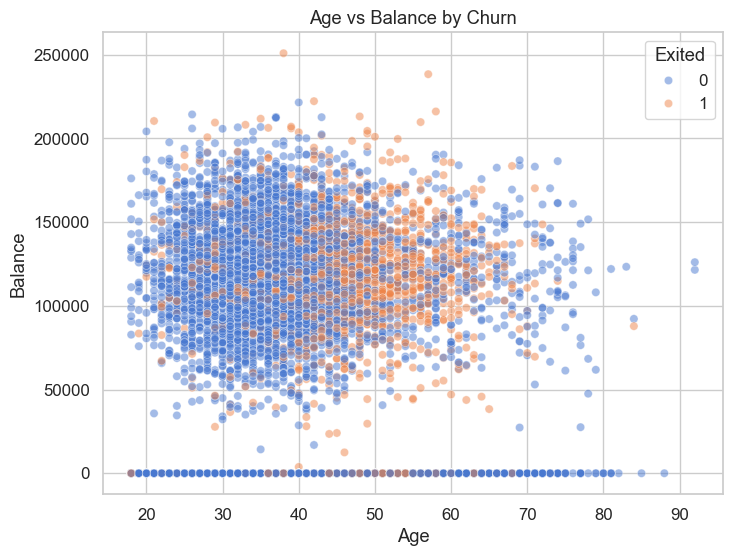

In [17]:
#  3. Numerical vs Numerical: Age vs Balance colored by Exited
plt.figure(figsize=(8, 6))
sns.scatterplot(data=churn_df, x='Age', y='Balance', hue='Exited', alpha=0.5)
plt.title('Age vs Balance by Churn')
plt.show()

## Data Spliting

In [18]:
# Split features and target
X = churn_df.drop(columns=['Exited'])
y = churn_df['Exited']

# Check class distribution
print("Class distribution in y:")
print(y.value_counts(normalize=True))

Class distribution in y:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


Train class distribution:
Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64
Test class distribution:
Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64


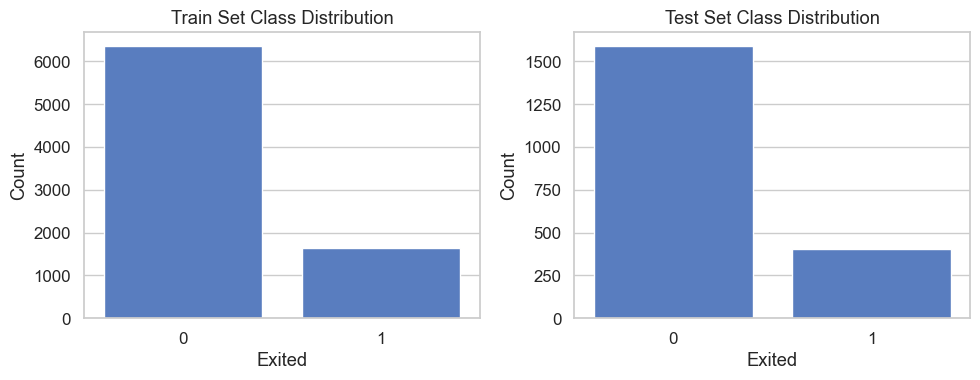

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Visualize class distribution in train and test sets
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Train Set Class Distribution')
axes[0].set_xlabel('Exited')
axes[0].set_ylabel('Count')
sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title('Test Set Class Distribution')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

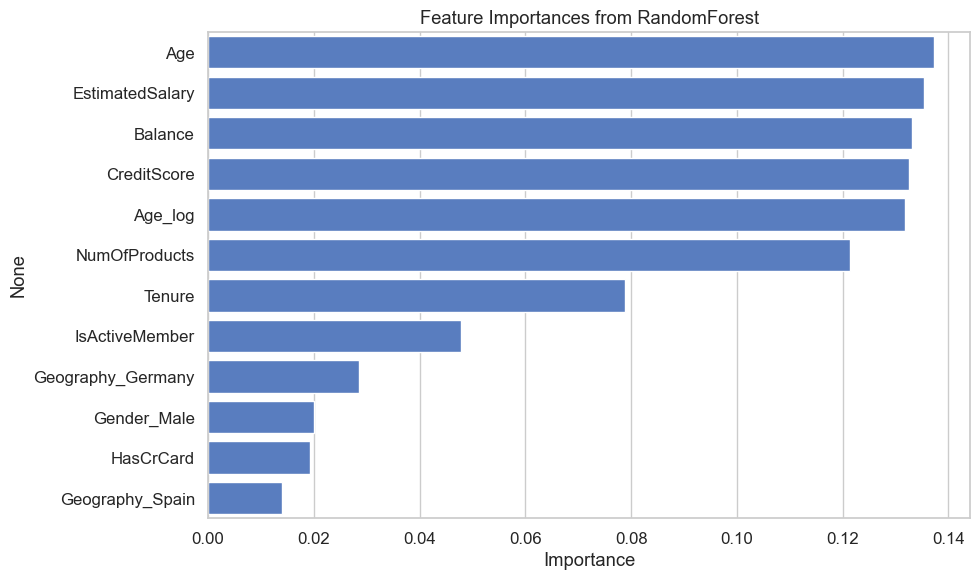

Age                  0.137313
EstimatedSalary      0.135472
Balance              0.133116
CreditScore          0.132472
Age_log              0.131848
NumOfProducts        0.121347
Tenure               0.078817
IsActiveMember       0.047772
Geography_Germany    0.028530
Gender_Male          0.020001
HasCrCard            0.019295
Geography_Spain      0.014019
dtype: float64

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data: encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Fit RandomForest on the training set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train.select_dtypes(exclude='object').join(pd.get_dummies(X_train.select_dtypes('object'), drop_first=True)), y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
importances = importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importances from RandomForest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

importances

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Age_log']
cat_features = ['Geography', 'Gender']

# Numerical pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Example: fit_transform on training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [23]:
# Fit a RandomForestClassifier on the processed training data
rf_pipe = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pipe.fit(X_train_processed, y_train)

# Get feature names from the preprocessor
num_feature_names = num_features
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_features)
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Get feature importances and display as a sorted Series
importances_pipe = pd.Series(rf_pipe.feature_importances_, index=all_feature_names).sort_values(ascending=False)
importances_pipe

Age                  0.137313
EstimatedSalary      0.135472
Balance              0.133116
CreditScore          0.132472
Age_log              0.131848
NumOfProducts        0.121347
Tenure               0.078817
IsActiveMember       0.047772
Geography_Germany    0.028530
Gender_Male          0.020001
HasCrCard            0.019295
Geography_Spain      0.014019
dtype: float64

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Handling imbalanced data: Common techniques

# 1. Resampling: Oversampling minority or undersampling majority class
# Example libraries: imblearn (pip install imbalanced-learn)

# 2. Class weights: Use class_weight='balanced' in classifiers like RandomForest, LogisticRegression
# Example:
# rf = RandomForestClassifier(class_weight='balanced', ...)

# 3. Ensemble methods: Use algorithms designed for imbalance, e.g., BalancedRandomForestClassifier, EasyEnsembleClassifier

# 4. Generate synthetic samples: SMOTE, ADASYN, etc.
# Example:
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X_train_processed, y_train)

# 5. Threshold moving: Adjust the decision threshold for positive class after model training

print("Suggested techniques for handling imbalanced data:")
print("1. Resampling (oversampling/undersampling)")
print("2. Using class weights in classifiers")
print("3. Specialized ensemble methods (e.g., BalancedRandomForest)")
print("4. Synthetic sample generation (SMOTE, ADASYN)")
print("5. Adjusting classification threshold")

Suggested techniques for handling imbalanced data:
1. Resampling (oversampling/undersampling)
2. Using class weights in classifiers
3. Specialized ensemble methods (e.g., BalancedRandomForest)
4. Synthetic sample generation (SMOTE, ADASYN)
5. Adjusting classification threshold


In [ ]:
# Apply SMOTE to the processed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)


# By default, SMOTE balances all classes equally. 
# To set a custom ratio, use the 'sampling_strategy' parameter.
# For example, to set the minority class to 80% of the majority class:

smote_custom = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_resampled, y_train_resampled = smote_custom.fit_resample(X_train_processed, y_train)
print("Original training set shape:", X_train_processed.shape)
print("Resampled training set shape:", X_train_resampled.shape)
print("Resampled class distribution:\n", pd.Series(y_train_resampled).value_counts())

Original training set shape: (8000, 12)
Resampled training set shape: (11466, 12)
Resampled class distribution:
 Exited
0    6370
1    5096
Name: count, dtype: int64


In [29]:
import os

# Create a new folder named 'dump_files' if it doesn't exist
os.makedirs('../dump_files', exist_ok=True)
print("Folder 'dump_files' created (or already exists).")

Folder 'dump_files' created (or already exists).


In [30]:
import joblib

# Save the preprocessor object to the dump_files folder
joblib.dump(preprocessor, '../dump_files/preprocessor.joblib')
print("Preprocessor saved to '../dump_files/preprocessor.joblib'")

Preprocessor saved to '../dump_files/preprocessor.joblib'


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Train a BalancedRandomForestClassifier on the resampled training data
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = brf.predict(X_test_processed)


print("BalancedRandomForestClassifier Performance on Test Set:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

BalancedRandomForestClassifier Performance on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.63      0.58      0.60       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix:
 [[1454  139]
 [ 172  235]]


In [32]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    brf,
    X_train_resampled,
    y_train_resampled,
    cv=kf,
    scoring='f1'
)

print("Cross-validated F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())

Cross-validated F1 scores: [0.87536801 0.87263682 0.87983912 0.87988136 0.88226528]
Mean F1 score: 0.8779981157845587


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example: Grid search for RandomForest hyperparameters on resampled data
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score: 0.8634879990503649


In [35]:
# Use the best parameters from grid_search to train a new RandomForestClassifier
best_params = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
best_rf.fit(X_train_resampled, y_train_resampled)

# Save the trained model to the dump_files folder
joblib.dump(best_rf, '../dump_files/best_rf_model.joblib')
print("Best RandomForest model saved to '../dump_files/best_rf_model.joblib'")

Best RandomForest model saved to '../dump_files/best_rf_model.joblib'
